### Week 12 - Lab assignment:

In this assignment you will perform topic modeling using Latent Dirichlet Allocation (LDA) on a dataset of Quora questions and visualize the word cloud for one of the identified topics. For this project you will be working with a dataset of over 400,000 quora questions that have no labeled category and attempting to find 20 categories to assign these questions to.

Steps:
1. Importing Libraries and Data
2. Creating Document-Term Matrix (DTM) using TfidfVectorizer
3. LDA Model Building
4. Displaying Top Words for Each Topic
5. Assigning Topics to Questions
6. Generating Word Cloud for a Specific Topic
7. Ploting the word cloud using Matplotlib

### Import pandas, WordCloud, and matplotlib

In [131]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#### Load the dataset: quora_questions.csv file into a variable called: quora

In [133]:
quora = pd.read_csv("quora_questions.csv")


#### Display the head

In [ ]:
print(quora.head())


### Notice how we don't have the topic of the articles, so let's use LDA to attempt to figure out clusters of the articles.

### Preprocessing

### Use TF-IDF Vectorization to create a vectorized document term matrix. 

### Note: in the example number 2, we used "CountVectorizer" and for this lab, we are using:  TfidfVectorizer

### import TfidfVectorizer

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer


**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

#### create a vectorized document term matrix using TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english') and call it: tfidf

In [93]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')


#### create a document term matrix dtm using tfidf.fit_transform

In [96]:
dtm = tfidf_vectorizer.fit_transform(quora['Question'])


# LDA

### import LatentDirichletAllocation

In [102]:
from sklearn.decomposition import LatentDirichletAllocation


### create and instance of a LDA with 20 expected components and use random_state=42

In [110]:
lda = LatentDirichletAllocation(n_components=20, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer


### fit the model (dtm)

In [108]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=20, random_state=42)

### Using a for loop, print out the top 15 most common words for each of the 20 topics.

In [116]:
lda.fit(dtm)


if hasattr(lda, 'components_'):
    
    words = tfidf_vectorizer.get_feature_names_out()

    
    for topic_idx, topic in enumerate(lda.components_):
        
        top_words_idx = topic.argsort()[-15:][::-1]
        
        
        top_words = [words[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")
else:
    print("The LDA model has not been fit properly.")


Topic #1: best, marketing, digital, social, service, does, development, company, sydney, media, friends, web, heard, source, good
Topic #2: word, english, tips, sentence, porn, god, speak, does, making, process, interview, used, best, addiction, doctor
Topic #3: education, successful, alcohol, center, india, does, structure, drug, good, gst, best, county, spotify, rehab, actor
Topic #4: quora, questions, people, iphone, mind, answers, tv, exist, know, don, facts, big, series, asked, interesting
Topic #5: culture, different, does, india, jobs, best, value, differences, address, companies, difference, car, types, corporate, australia
Topic #6: war, world, pakistan, india, math, relationship, does, china, did, country, russia, distance, long, win, like
Topic #7: weight, lose, best, meaning, places, visit, days, day, live, period, pregnant, place, gain, sleep, life
Topic #8: trump, improve, donald, president, clinton, english, hillary, skills, win, election, writing, presidential, best, vo

#### Add a new column to the original quora dataframe that labels each question into one of the 20 topic categories.

In [180]:
topic_distribution = lda.transform(dtm)


topic_labels = topic_distribution.argmax(axis=1)


quora['Topic_Label'] = topic_labels


print(quora.head())


                                            Question  Topic_Label
0  What is the step by step guide to invest in sh...           16
1  What is the story of Kohinoor (Koh-i-Noor) Dia...           17
2  How can I increase the speed of my internet co...            8
3  Why am I mentally very lonely? How can I solve...           19
4  Which one dissolve in water quikly sugar, salt...           17


#### Display the head(10)

In [154]:
print(quora.head(10))


                                            Question
0  What is the step by step guide to invest in sh...
1  What is the story of Kohinoor (Koh-i-Noor) Dia...
2  How can I increase the speed of my internet co...
3  Why am I mentally very lonely? How can I solve...
4  Which one dissolve in water quikly sugar, salt...
5  Astrology: I am a Capricorn Sun Cap moon and c...
6                                Should I buy tiago?
7                     How can I be a good geologist?
8                    When do you use シ instead of し?
9  Motorola (company): Can I hack my Charter Moto...


In [156]:
# sample

#### Use WordCloud to print one topics 

In [176]:
topic_8_questions = quora[quora['Topic_Label'] == 8]['Question'].to_string()


print(topic_8_questions)


2         How can I increase the speed of my internet co...
73        How helpful is QuickBooks' auto data recovery ...
93                                 What causes a nightmare?
130                         What are some yakshini mantras?
132                 How do I register my domain site email?
156       If I do not monetize YouTube videos & upload c...
174            How do I switch from Apple Music to Spotify?
184       How can I check wifi history and access it thr...
207       What are the best quotes/lessons of the Assass...
245                        How do you get a book published?
262          What are your New Year's resolutions for 2017?
276       How far would you go for love? Should I wait f...
306       How is petrol or diesel pumped up in a filling...
310                         Can I use Jio SIM in iPhone 5s?
325              How do I know if someone blocked my texts?
338       I wish to simulate a fake location for an app ...
352       How do I send message from one

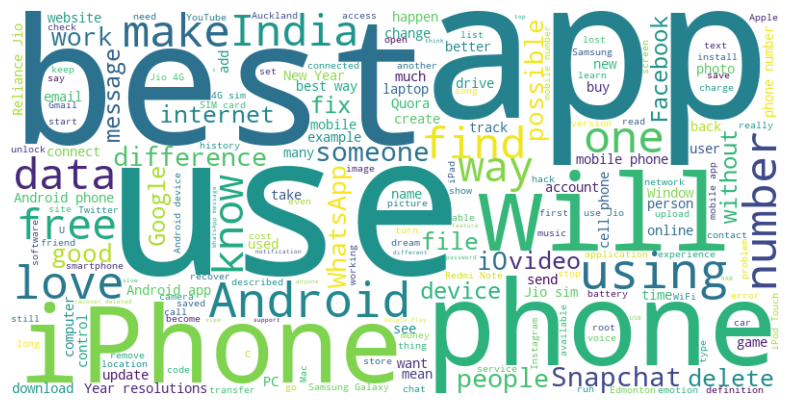

In [178]:
# use wordcloud here
topic_8_words = quora[quora['Topic_Label'] == 8]['Question'].str.cat(sep=' ')


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_8_words)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()
